In [1]:
from helpers import *

In [2]:
### Set parameters
parfilename = "par_asw"
chrm = 1
querypop_file = "tutorial_data/asw_four"
sourcepop_file = "tutorial_data/merged_ref"
poplist = "poplist.txt"
ancestrylist = "ancestrylist.txt"
output_tag = "_asw_rfprobs"
logfile = "logfile%s" % output_tag
w_size = 0.2

to_txt_file(["ASW", "CEU", "YRI"], poplist)
to_txt_file(["CEU", "YRI"], ancestrylist)

In [3]:
### Convert the data to RFMix input format
make_conversion_par(parfilename, chrm, querypop_file, sourcepop_file, poplist, ancestrylist, output_tag)
run_conversion(parfilename)

In [4]:
### RunRFMix.py
# included two executables, one for Linux and one for Mac, in binaries/.
# Move the correct executable for your OS into the PopPhased folder, and name it RFMix_PopPhased
run_rfmix(parfilename, chrm, output_tag, w_size, logfile) # you can check this logfile to see RFMix's output

Done running RFMix.


In [5]:
### Visualize the classification results
import numpy as np
import matplotlib.pyplot as plt

rfmix_probs = "outputPopPhased%s%s.0.ForwardBackward.txt" % (chrm, output_tag)
probs = np.loadtxt(rfmix_probs, dtype=float)

aswSNP = np.loadtxt("tutorial_data/asw_four.phsnp", dtype=str)
aswOrigIND = np.loadtxt("tutorial_data/asw_four.phind", dtype=str)

In [6]:
def plot_haplotype(probs, aswSNP, aswOrigIND, hapIDX):
    snpPHYSPOS = []
    for snp in aswSNP: # assumes all from chrm1
        snpPHYSPOS.append(float(snp[3]))

    indNAME = aswOrigIND[hapIDX][0]
    hapProbs = []
    for snp in probs:
        hapProbs.append(snp[(hapIDX*2):((hapIDX*2)+2)])

    calls = []
    ceuProbs, yriProbs = [], []
    for prob in hapProbs:
        ceuProb, yriProb = prob
        ceuProbs.append(ceuProb)
        yriProbs.append(yriProb)
        if ceuProb > yriProb:
            call = 0 # CEU
        elif ceuProb < yriProb:
                call = 1 # YRI
    fig = plt.figure()

    plt.plot(snpPHYSPOS, yriProbs, marker='.', label="YRI")
    plt.plot(snpPHYSPOS, ceuProbs, marker='.', label="CEU")
    
    plt.xlabel("Physical Position")
    plt.ylabel("RFMix Probabilities")
    plt.legend(loc="best")
    plt.title("RFMix Probabilities Across the Genome for Individual " + str(indNAME))
    plt.show()


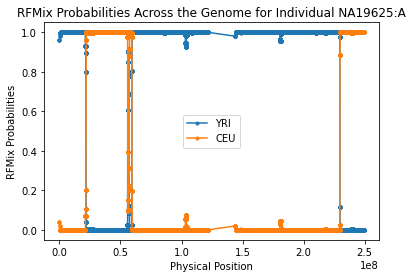

In [7]:
plot_haplotype(probs, aswSNP, aswOrigIND, 0)

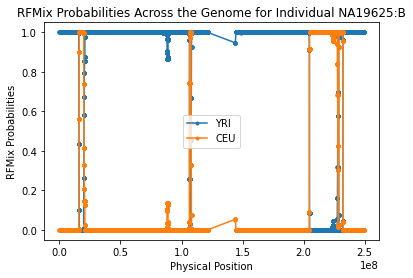

In [8]:
plot_haplotype(probs, aswSNP, aswOrigIND, 1)